In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 21_11_2022 07_32_59.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 14_06_2022 07_33_53.xlsx')

In [5]:
filtrado = dados[['Sem Epi Internacao','Tem Comorbidade','Doenca Cardiovascular','Diabetes mellitus','Obesidade','Doenca Neurologica','Outra Pneumatopatia','Faixa Etaria','Classificacao final','Houve internacao','Evolucao']]
filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
                                                         '40-49 anos':'20-59 anos','50-59 anos':'20-59 anos','60-69 anos':'60 anos ou mais','70-79 anos':'60 anos ou mais',
                                                         '80 e mais anos':'60 anos ou mais'})
filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
filtrado['Diabetes mellitus'] = filtrado['Diabetes mellitus'].map({1.0:'Diabetes mellitus'})
filtrado['Obesidade'] = filtrado['Obesidade'].map({'1':'Obesidade'})
filtrado['Doenca Neurologica'] = filtrado['Doenca Neurologica'].map({1.0:'Doença neurológica'})
filtrado['Outra Pneumatopatia'] = filtrado['Outra Pneumatopatia'].map({1.0:'Outra pneumatopatia'})


C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_21816/844377761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Faixa Etaria'] = filtrado['Faixa Etaria'].map({'0-9 anos':'0-9 anos','10-19 anos':'10-19 anos','20-29 anos':'20-59 anos','30-39 anos':'20-59 anos',
C:\Users\RYAN-R~1\AppData\Local\Temp/ipykernel_21816/844377761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrado['Doenca Cardiovascular'] = filtrado['Doenca Cardiovascular'].map({1.0:'Doença cardiovascular'})
C:\Users\RYAN-R~1\A

In [6]:
#filtrado = filtrado.sort_values(by='Sem Epi Internacao')
#filtrado = filtrado.set_index('Sem Epi Internacao')
#filtrado = filtrado['2022_13':]
#filtrado

In [7]:
anos60Mais_obito = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
anos60Mais_obito = anos60Mais_obito.loc[anos60Mais_obito['Classificacao final']=='COVID-19']
anos60Mais_obito = anos60Mais_obito.loc[anos60Mais_obito['Evolucao']=='Óbito']

In [8]:
temComorbidade_obito = anos60Mais_obito.loc[anos60Mais_obito['Tem Comorbidade']=='Sim']
temComorbidade_obito = temComorbidade_obito.groupby('Tem Comorbidade').count()
temComorbidade_obito = temComorbidade_obito.drop(temComorbidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_obito = anos60Mais_obito.groupby('Doenca Cardiovascular').count()
doencaCardio_obito = doencaCardio_obito.drop(doencaCardio_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_obito = anos60Mais_obito.groupby('Diabetes mellitus').count()
diabetesmellitus_obito = diabetesmellitus_obito.drop(diabetesmellitus_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_obito = anos60Mais_obito.groupby('Obesidade').count()
obesidade_obito = obesidade_obito.drop(obesidade_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_obito = anos60Mais_obito.groupby('Doenca Neurologica').count()
doencaneuro_obito = doencaneuro_obito.drop(doencaneuro_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_obito = anos60Mais_obito.groupby('Outra Pneumatopatia').count()
outrapneu_obito = outrapneu_obito.drop(outrapneu_obito.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_obito

,Houve internacao,Evolucao
Outra Pneumatopatia,,
Outra pneumatopatia,3396,3396


In [9]:
totalObitos_anos60Mais = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
totalObitos_anos60Mais = totalObitos_anos60Mais.loc[totalObitos_anos60Mais['Evolucao']=='Óbito']
totalObitos_anos60Mais = totalObitos_anos60Mais.loc[totalObitos_anos60Mais['Classificacao final']=='COVID-19']
totalObitos_anos60Mais = totalObitos_anos60Mais.groupby('Evolucao').count()
totalObitos_anos60Mais = totalObitos_anos60Mais.drop(totalObitos_anos60Mais.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalObitos_anos60Mais = totalObitos_anos60Mais.reset_index()
totalObitos_anos60Mais = totalObitos_anos60Mais['Houve internacao']
totalObitos_anos60Mais

0    30056
Name: Houve internacao, dtype: int64

In [10]:
juntaAnos60Mais_obito = temComorbidade_obito.append(doencaCardio_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(diabetesmellitus_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(obesidade_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(doencaneuro_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.append(outrapneu_obito)
juntaAnos60Mais_obito = juntaAnos60Mais_obito.rename({'Sim':'Alguma comorbidade'})
juntaAnos60Mais_obito = juntaAnos60Mais_obito.reset_index()
juntaAnos60Mais_obito

,index,Houve internacao,Evolucao
0,Alguma comorbidade,27202,27202
1,Doença cardiovascular,16026,16026
2,Diabetes mellitus,10815,10815
3,Obesidade,3278,3278
4,Doença neurológica,3839,3839
5,Outra pneumatopatia,3396,3396


In [11]:
ordenaAnos60Mais_obito = juntaAnos60Mais_obito.copy()
ordenaAnos60Mais_obito.loc[0] = juntaAnos60Mais_obito.loc[5]
ordenaAnos60Mais_obito.loc[1] = juntaAnos60Mais_obito.loc[3]
ordenaAnos60Mais_obito.loc[2] = juntaAnos60Mais_obito.loc[4]
ordenaAnos60Mais_obito.loc[3] = juntaAnos60Mais_obito.loc[2]
ordenaAnos60Mais_obito.loc[4] = juntaAnos60Mais_obito.loc[1]
ordenaAnos60Mais_obito.loc[5] = juntaAnos60Mais_obito.loc[0]
ordenaAnos60Mais_obito

,index,Houve internacao,Evolucao
0,Outra pneumatopatia,3396,3396
1,Obesidade,3278,3278
2,Doença neurológica,3839,3839
3,Diabetes mellitus,10815,10815
4,Doença cardiovascular,16026,16026
5,Alguma comorbidade,27202,27202


In [12]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos60Mais_obito),1):
    divisao.loc[i] = totalObitos_anos60Mais.loc[0]
divisao = divisao.fillna(ordenaAnos60Mais_obito)

In [13]:
calcula_anos60Mais_obito = ordenaAnos60Mais_obito['Evolucao']/divisao['Valores']*100
calcula_anos60Mais_obito = calcula_anos60Mais_obito.to_frame()
calcula_anos60Mais_obito = calcula_anos60Mais_obito.rename(columns={0:'Evolucao'})
calcula_anos60Mais_obito = calcula_anos60Mais_obito['Evolucao']
calcula_anos60Mais_obito

0    11.298909
1    10.906308
2    12.772824
3    35.982832
4    53.320468
5    90.504392
Name: Evolucao, dtype: object

In [14]:
anos60Mais_hospi = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
anos60Mais_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Houve internacao']=='Sim']
anos60Mais_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Classificacao final']=='COVID-19']
anos60Mais_hospi

,Sem Epi Internacao,Tem Comorbidade,Doenca Cardiovascular,Diabetes mellitus,Obesidade,Doenca Neurologica,Outra Pneumatopatia,Faixa Etaria,Classificacao final,Houve internacao,Evolucao
9,2021_01,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
10,2021_10,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
17,2021_05,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
19,2021_08,Sim,NaN,NaN,NaN,Doença neurológica,NaN,60 anos ou mais,COVID-19,Sim,Óbito
22,2021_03,Sim,Doença cardiovascular,Diabetes mellitus,NaN,Doença neurológica,NaN,60 anos ou mais,COVID-19,Sim,Óbito
...,...,...,...,...,...,...,...,...,...,...,...
184415,2021_10,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Cura
184419,2020_52,Não,NaN,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
184424,2021_15,Sim,Doença cardiovascular,Diabetes mellitus,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito
184425,2021_15,Sim,Doença cardiovascular,NaN,NaN,NaN,NaN,60 anos ou mais,COVID-19,Sim,Óbito


In [15]:
#for i in range(len(filtrado)):
  #  if(filtrado['has'].loc[i]==1.0):
 #       filtrado['Doenca Cardiovascular'].loc[i] = 1.0
 #   else:
 #       pass

In [16]:
temComorbidade_hospi = anos60Mais_hospi.loc[anos60Mais_hospi['Tem Comorbidade']=='Sim']
temComorbidade_hospi = temComorbidade_hospi.groupby('Tem Comorbidade').count()
temComorbidade_hospi = temComorbidade_hospi.drop(temComorbidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaCardio_hospi = anos60Mais_hospi.groupby('Doenca Cardiovascular').count()
doencaCardio_hospi = doencaCardio_hospi.drop(doencaCardio_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
diabetesmellitus_hospi = anos60Mais_hospi.groupby('Diabetes mellitus').count()
diabetesmellitus_hospi = diabetesmellitus_hospi.drop(diabetesmellitus_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
obesidade_hospi = anos60Mais_hospi.groupby('Obesidade').count()
obesidade_hospi = obesidade_hospi.drop(obesidade_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
doencaneuro_hospi = anos60Mais_hospi.groupby('Doenca Neurologica').count()
doencaneuro_hospi = doencaneuro_hospi.drop(doencaneuro_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_hospi = anos60Mais_hospi.groupby('Outra Pneumatopatia').count()
outrapneu_hospi = outrapneu_hospi.drop(outrapneu_hospi.columns[[0,1,2,3,4,5,6,7]],axis=1)
outrapneu_hospi

,Houve internacao,Evolucao
Outra Pneumatopatia,,
Outra pneumatopatia,6088,6088


In [17]:
totalHospi_anos60Mais = filtrado.loc[filtrado['Faixa Etaria']=='60 anos ou mais']
totalHospi_anos60Mais = totalHospi_anos60Mais.loc[totalHospi_anos60Mais['Houve internacao']=='Sim']
totalHospi_anos60Mais = totalHospi_anos60Mais.loc[totalHospi_anos60Mais['Classificacao final']=='COVID-19']
totalHospi_anos60Mais = totalHospi_anos60Mais.groupby('Houve internacao').count()
totalHospi_anos60Mais = totalHospi_anos60Mais.drop(totalHospi_anos60Mais.columns[[0,1,2,3,4,5,6,7]],axis=1)
totalHospi_anos60Mais = totalHospi_anos60Mais.reset_index()
totalHospi_anos60Mais = totalHospi_anos60Mais['Evolucao']
totalHospi_anos60Mais

0    66747
Name: Evolucao, dtype: int64

In [18]:
juntaAnos60Mais_hospi = temComorbidade_hospi.append(doencaCardio_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(diabetesmellitus_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(obesidade_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(doencaneuro_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.append(outrapneu_hospi)
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.rename({'Sim':'Alguma comorbidade'})
juntaAnos60Mais_hospi = juntaAnos60Mais_hospi.reset_index()
juntaAnos60Mais_hospi

,index,Houve internacao,Evolucao
0,Alguma comorbidade,56321,56321
1,Doença cardiovascular,33207,33207
2,Diabetes mellitus,21831,21831
3,Obesidade,6465,6465
4,Doença neurológica,6102,6102
5,Outra pneumatopatia,6088,6088


In [19]:
ordenaAnos60Mais_hospi = juntaAnos60Mais_hospi.copy()
ordenaAnos60Mais_hospi.loc[0] = juntaAnos60Mais_hospi.loc[5]
ordenaAnos60Mais_hospi.loc[1] = juntaAnos60Mais_hospi.loc[3]
ordenaAnos60Mais_hospi.loc[2] = juntaAnos60Mais_hospi.loc[4]
ordenaAnos60Mais_hospi.loc[3] = juntaAnos60Mais_hospi.loc[2]
ordenaAnos60Mais_hospi.loc[4] = juntaAnos60Mais_hospi.loc[1]
ordenaAnos60Mais_hospi.loc[5] = juntaAnos60Mais_hospi.loc[0]
ordenaAnos60Mais_hospi

,index,Houve internacao,Evolucao
0,Outra pneumatopatia,6088,6088
1,Obesidade,6465,6465
2,Doença neurológica,6102,6102
3,Diabetes mellitus,21831,21831
4,Doença cardiovascular,33207,33207
5,Alguma comorbidade,56321,56321


In [20]:
divisao = pd.DataFrame(columns={'Valores'})
for i in np.arange(0,len(ordenaAnos60Mais_hospi),1):
    divisao.loc[i] = totalHospi_anos60Mais.loc[0]
divisao = divisao.fillna(ordenaAnos60Mais_hospi)

In [21]:
calcula_anos60Mais_hospi = ordenaAnos60Mais_hospi['Evolucao']/divisao['Valores']*100
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi.to_frame()
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi.rename(columns={0:'Evolucao'})
calcula_anos60Mais_hospi = calcula_anos60Mais_hospi['Evolucao']
calcula_anos60Mais_hospi

0     9.121009
1     9.685829
2     9.141984
3    32.707088
4    49.750551
5    84.379822
Name: Evolucao, dtype: object

In [22]:
comorbidade = ordenaAnos60Mais_obito['index']

In [23]:
legenda = pd.DataFrame(columns=['Óbito','Hospitalização'])

In [24]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 21_11_2022'

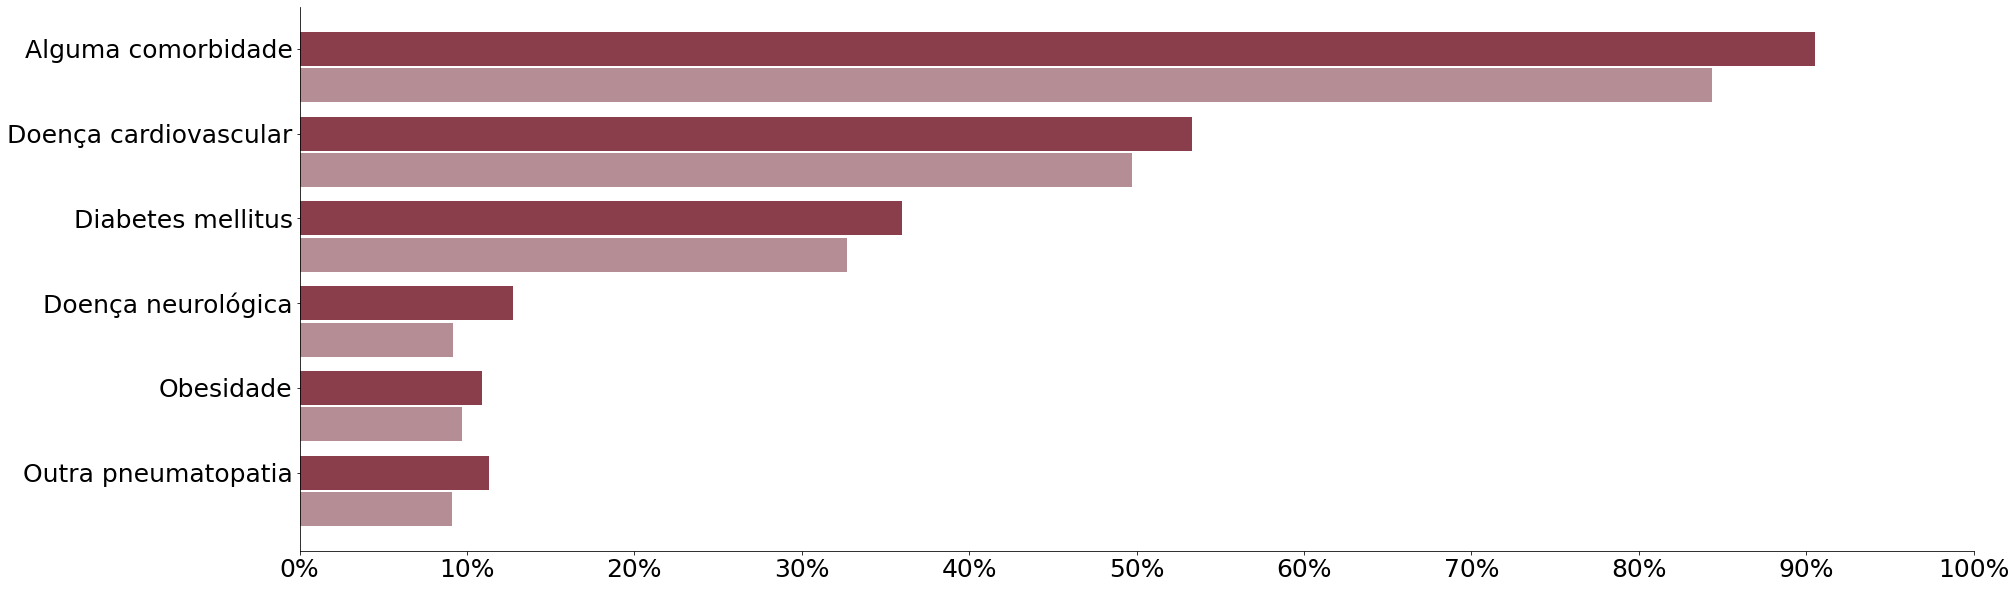

In [25]:
plt.figure(figsize=(30,10))
width=0.4
plt.barh(comorbidade,calcula_anos60Mais_obito,width,color='#8a3e4b')
plt.barh(np.arange(0,np.size(comorbidade),1)-0.43,calcula_anos60Mais_hospi,width,color='#b58d94')
sns.despine()
plt.xticks(np.arange(0,110,10),fontsize=25)
plt.yticks(fontsize=25)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_xticks()])
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/comorb_Covid_60mais.png',dpi=720,bbox_inches='tight')